# Scikit-learn: apprentissage statistique avec Python

++ Les différentes fonctions

* Apprentissage supervisé: 
    - Arbres de décision (Random-Forest, Boosted Tree)
    - Modèles linéaires
    - SVM : Singular Value Decomposition
    
* Apprentissage non supervisé:
    - Clustering
    - Apprentissage de dictionnaire
    -Détection d'outliers
    
    
* Sélection de modèles:
    - Validation croisée intégrée
    - Optimisation de paramètres
    
++ Structures de données

* Tableau numpy
    - Tableau numérique typé n-dimensionnel
    - Abstraction sur un pointeur
    
* Matrice creuse scipy
    - Structure 2D avec peu d'éléments
    - Différentes représentations de données
    
Calcul vectoriels : opérations numériques et matricielles





# Application 1: Classification automatique par espèces de spécimens d'iris

In [62]:
import numpy as np
import matplotlib.pyplot as plt


# Chargement de données

# A partir du sous-module datasets du module sklearn,
# On charge les données de spécimens d'iris
from sklearn.datasets import load_iris

# On nomme l'objet (ou la variable) contenant les données
iris = load_iris()

In [29]:
""" Quelques manipulations utiles pour comprendre 
    Les données:
    1 - On regarde le type avec la fonction type
    2 - On regarde l'ensemble de méthodes opérant sur
    l'objet
    3 - On essaye d'explorer les différentes composantes
    (de proche en proche)
"""

# On utilise la fonction type()
type(iris)

sklearn.utils.Bunch

In [30]:
# Avec la fonction dir() on voit plus clair
# On obtient donc une liste de méthodes et
# d'attributs opérant sur l'objet iris
dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [31]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [32]:
# DESCR est une chaîne de caractères 
type(iris.DESCR)
# Regardons-la

str

In [33]:
# Un essai raté
iris.DESCR
# Bon, on utilise donc la fonction print()

'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ============

In [34]:
# print() permet de voir en plus clair le contenu de DESCR
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

* Je pense que tu as compris que DESCR contient une description détaillée du contenu de notre base de données
    
X est un tableau ou une matrice de forme 

$n_{observations} * n_{descripteurs} $

y est un tableau numpy, entier ou flottant $n_{observations}$


Suivant les informations détaillées dans la descripton : 

* Dans notre cas X c'est iris.data: c'est une matrice à 150 lignes par 4 colonnes
* Nous avons 150 entrées et 4 variables


L'échantillon contient 150 fleurs, chaque fleur est caractérisée par 4 variables (sepal length (cm), sepal width (cm),petal length (cm), petal width (cm)).



In [35]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [36]:
# Type de data
type(iris.data)
# C'est un tableau numpy (une matrice)
# on utilise shape pour sa structure
print(iris.data.shape)

(150, 4)


In [37]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [38]:
dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [39]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [40]:
type(iris.target)

numpy.ndarray

In [41]:
iris.target.shape

(150,)

In [42]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state = 0)

In [51]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


0.3392857142857143

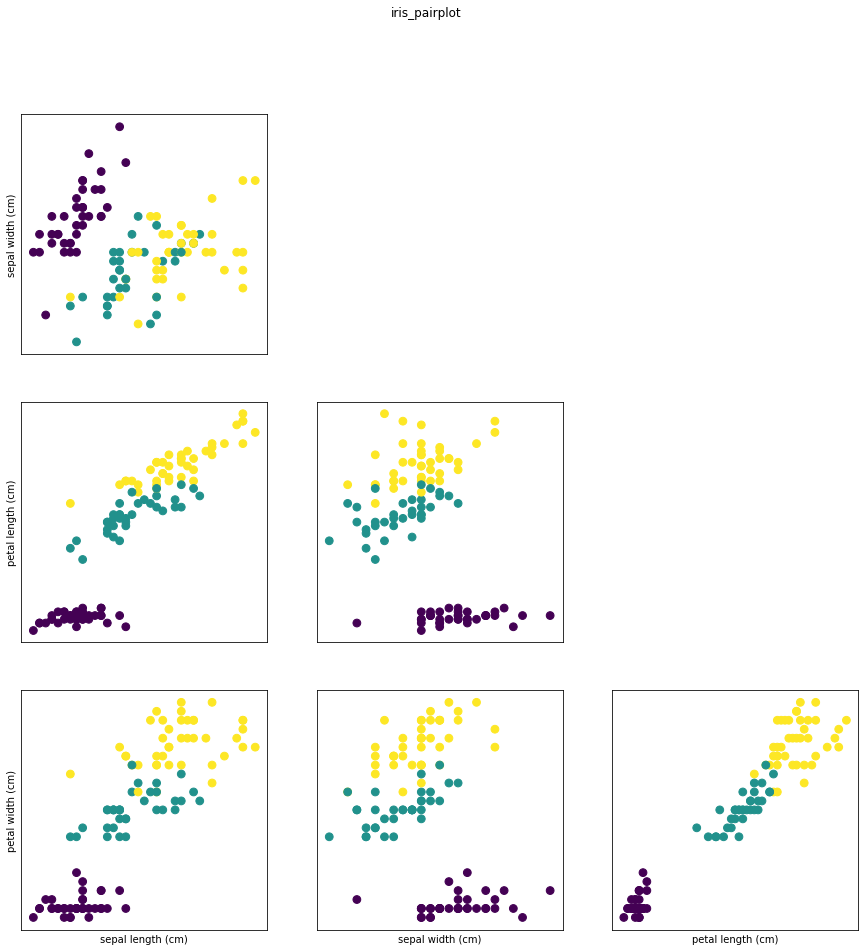

In [56]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 3, figsize=(15, 15))

plt.suptitle("iris_pairplot")


for i in range(3):
    for j in range(3):
        ax[i, j].scatter(X_train[:, j], X_train[:, i + 1], c=y_train, s=60)
        ax[i, j].set_xticks(())
        ax[i, j].set_yticks(())
        if i == 2:
            ax[i, j].set_xlabel(iris['feature_names'][j])
        if j == 0:
            ax[i, j].set_ylabel(iris['feature_names'][i + 1])
        if j > i:
            ax[i, j].set_visible(False)

In [58]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

In [59]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [60]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=1, p=2, weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [72]:
X_new = np.array([[5, 2.9, 1, 0.2]])

X_new.shape

(1, 4)

In [73]:
prediction = knn.predict(X_new)
prediction

array([0])

In [67]:
iris['target_names'][prediction]

array(['setosa'], dtype='<U10')

In [69]:
y_pred = knn.predict(X_test)
np.mean(y_pred == y_test)

0.9736842105263158

In [70]:
knn.score(X_test, y_test)

0.9736842105263158

In [74]:
n_samples, n_features = iris.data.shape
print('Number of samples:', n_samples)
print('Number of features:', n_features)
# the sepal length, sepal width, petal length and petal width of the first sample (first flower)
print(iris.data[0])

Number of samples: 150
Number of features: 4
[5.1 3.5 1.4 0.2]


In [75]:
print(iris.data.shape)
print(iris.target.shape)
print(iris.target)

(150, 4)
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [76]:
import numpy as np

np.bincount(iris.target)

array([50, 50, 50])

In [77]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [82]:
print(type(iris.target_names))
iris.target_names[2]

<class 'numpy.ndarray'>


'virginica'

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt



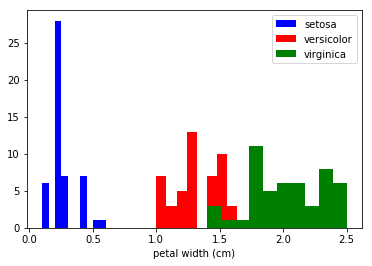

In [89]:
x_index = 3
colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.hist(iris.data[iris.target==label, x_index], 
             label=iris.target_names[label],
             color=color)

plt.xlabel(iris.feature_names[x_index])
plt.legend(loc='upper right')
plt.show()

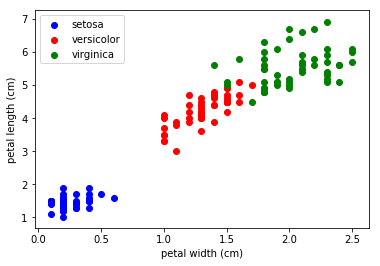

In [98]:
x_index = 3
y_index = 2

colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.scatter(iris.data[iris.target==label, x_index], 
                iris.data[iris.target==label, y_index],
                label=iris.target_names[label],
                c=color)

plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.legend(loc='upper left')
plt.show()

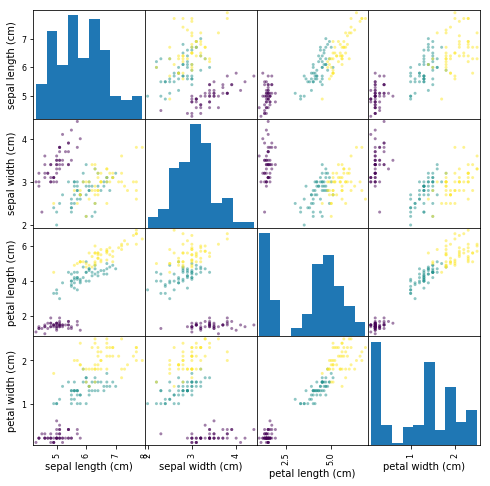

In [99]:
import pandas as pd
    
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c=iris.target, figsize=(8, 8));